In [1]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist      #mnist dataset
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils 

In [31]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


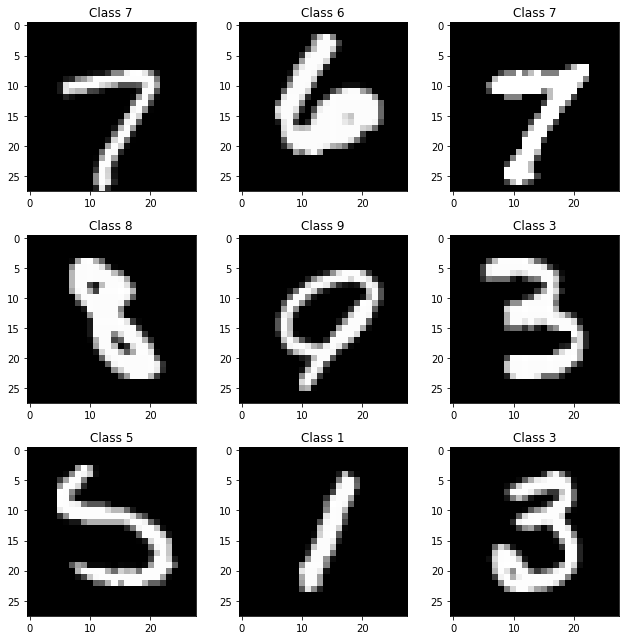

In [9]:
plt.rcParams['figure.figsize'] = (9,9)

for i in range(9):
  plt.subplot(3,3,i+1)
  num = random.randint(0, len(X_train))
  plt.imshow(X_train[num],cmap='gray',interpolation = 'none')
  plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [11]:
def matprint(mat,fmt="g"):
  col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
  for x in mat:
    for i, y in enumerate(x):
      print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=" ")
      print(" ")

matprint(X_train[num])

0  
0  
0  
0  
0  
0  
 0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
 0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
 0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
 0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
 0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
 0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
 0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
 0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
 0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
  0  
 42  
196  
247  
130  
 27  
  0  
 0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
 0  
  0  
  0  
  0  
  0  
  8  
 94  
177  
236  
245  
253  
253  
253  
216  
 10  
 0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
0  
 0  
  0  
  0  
 11  
 89  
210  
253  
253  
254  
253  
253  
253  
253  
254  
 31  
 0  
0  
0  
0  
0  
0  
0  
0  
0 

In [13]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_test /=255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [14]:
nb_classes = 10

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

In [17]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [18]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_test /=255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [19]:
nb_classes = 10

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [20]:
model = Sequential() # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
convLayer01 = Activation('relu') # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
model.add(Activation('relu')) # activation
convLayer02 = MaxPooling2D(pool_size=(2,2)) # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3))) # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
convLayer03 = Activation('relu') # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3))) # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1)) # normalize each feature map before activation
model.add(Activation('relu')) # activation
convLayer04 = MaxPooling2D(pool_size=(2,2)) # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten()) # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512)) # 512 FCN nodes
model.add(BatchNormalization()) # normalization
model.add(Activation('relu')) # activation

# Fully Connected Layer 6
model.add(Dropout(0.2)) # 20% dropout of randomly selected nodes
model.add(Dense(10)) # final 10 FCN nodes
model.add(Activation('softmax')) # softmax activation

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
gen= ImageDataGenerator(rotation_range=8,width_shift_range=0.08,shear_range=0.3,
                        height_shift_range=0.08,zoom_range=0.08)
test_gen= ImageDataGenerator()

In [25]:
train_generator = gen.flow(X_train,y_train,batch_size = 128)
test_generator = gen.flow(X_test,y_test,batch_size = 128)

In [29]:
model.fit_generator(train_generator,steps_per_epoch=60000//128,epochs=5,verbose=1,
                    validation_data=test_generator,validation_steps=10000//128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
468/468 [==============================] - 201s 428ms/step - loss: 0.1309 - accuracy: 0.9599 - val_loss: 0.5036 - val_accuracy: 0.8187
Epoch 2/5
468/468 [==============================] - 194s 415ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 3/5
468/468 [==============================] - 184s 393ms/step - loss: 0.0408 - accuracy: 0.9871 - val_loss: 0.0354 - val_accuracy: 0.9891
Epoch 4/5
468/468 [==============================] - 178s 380ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0356 - val_accuracy: 0.9887
Epoch 5/5
468/468 [==============================] - 209s 447ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0376 - val_accuracy: 0.9884


In [30]:
score=model.evaluate(X_test,y_test)
print('Test score:',score[0])
print('Test accuracy:',score[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.0245 - accuracy: 0.9917
Test score: 0.02447608858346939
Test accuracy: 0.9916999936103821


In [32]:
from keras import backend as K

# choose any image to want by specifying the index
img = X_test[3]
img = np.expand_dims(img, axis=0) # Keras requires the image to be in 4D, so we add an extra dimension to it.

# Not important to understand how this function work -- It just plots a convolution layer

def visualize(layer):
  inputs = [K.learning_phase()] + model.inputs

  _convout1_f = K.function(inputs, [layer.output])

def convout1_f(X):
# The [0] is to disable the training phase flag
  return _convout1_f([0] + [X])

  convolutions = convout1_f(img)
  convolutions = np.squeeze(convolutions)

  print ('Shape of conv:', convolutions.shape)

  m = convolutions.shape[2]
  n = int(np.ceil(np.sqrt(m)))

# Visualization of each filter of the layer
  fig = plt.figure(figsize=(15,12))
  for i in range(m):
    ax = fig.add_subplot(n,n,i+1)
    ax.imshow(convolutions[:,:,i], cmap='gray')

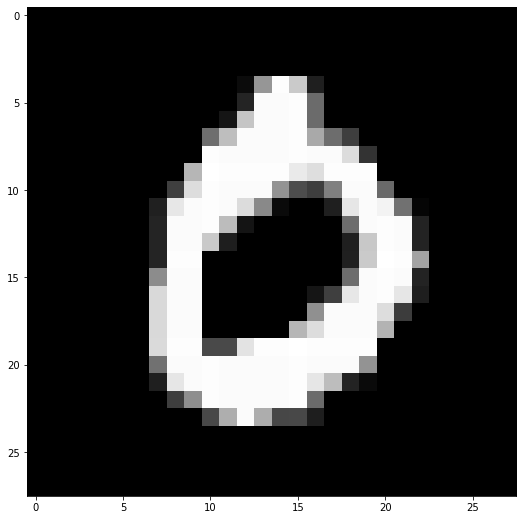

In [33]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')